In [1]:
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('1.jpg')

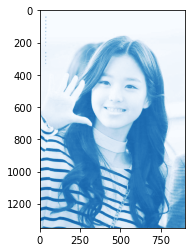

In [2]:
plt.imshow(img[:,:,0], cmap='Blues_r')

In [4]:
import numpy as np
img_r = np.zeros_like(img)
img_r.shape

(1350, 900, 3)

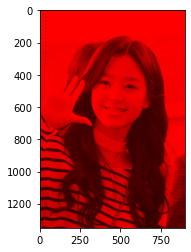

In [5]:
img_r[...,0] = img[:,:,0]
plt.imshow(img_r)

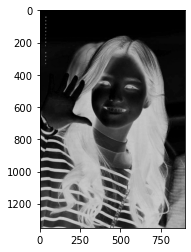

In [6]:
plt.imshow(img[:,:,0], cmap='gray_r')  # 진한 부분에 red가 많음.

### Monkey Patch

- import 한거에 따라 원래 기능에 더 추가해 import

In [1]:
import matplotlib
len(dir(matplotlib))

100

In [2]:
import matplotlib.pyplot as plt
len(dir(matplotlib))

159

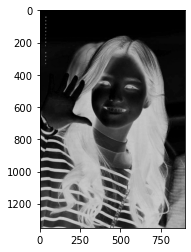

In [3]:
from skimage import io
img = io.imread('1.jpg')
plt.imshow(img[:,:,0], cmap=plt.cm.gray_r)

## mutable technique

- 자기 자신 변경 O -> return None  (append)
- 자기 자신 변경 X -> return  (index)
- 자기 자신 변경 O -> return  (pop)

In [8]:
from PIL import ImageDraw
from PIL import Image
import numpy as np
img = Image.open('1.jpg')
draw = ImageDraw.Draw(img)
draw.rectangle(((300,300),(500,500)),width=5)

In [12]:
draw.ellipse(((500,500),(700,700)),fill = 'white') # 원그리기
#img
# 실수하면 복구가 안된다...

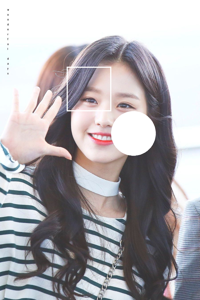

In [15]:
img2 = Image.open('1.jpg')
img3 = img2
draw = ImageDraw.Draw(img2)
draw.rectangle(((300,300),(500,500)),width=5)
draw.ellipse(((500,500),(700,700)),fill = 'white')
img3.resize((200,300))

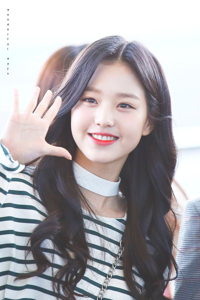

In [16]:
img2 = Image.open('1.jpg')
img4 = img2.copy() # copy해서 공유 안하도록
draw = ImageDraw.Draw(img2)
draw.rectangle(((300,300),(500,500)),width=5)
draw.ellipse(((500,500),(700,700)),fill = 'white')
img4.resize((200,300))

In [17]:
jang = Image.open('1.jpg')
dir(jang)

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'bits',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'entropy',
 'filename',
 'filter',
 'format',
 'format_description',
 'fp'

_ 하나면 private처럼 쓰기

### PIL에서 확인할 것

**핵심**
- size
- format
- mode



In [18]:
jang.format

'JPEG'

In [19]:
jang.format_description

'JPEG (ISO 10918)'

In [107]:
test = Image.open('2.jpg')
test._getexif() # None일때 : metadata가 없다.

{36864: b'0220',
 37121: b'\x01\x02\x03\x00',
 37377: 11.73,
 36867: '2020:08:06 16:12:41',
 36868: '2020:08:06 16:12:41',
 37378: 1.53,
 37379: 9.34,
 37380: 0.0,
 37381: 1.53,
 37383: 5,
 37385: 0,
 37386: 4.3,
 37510: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 40961: 1,
 40962: 4032,
 41990: 0,
 37520: '0726',
 37521: '0726',
 37522: '0726',
 40963: 3024,
 271: 'samsung',
 272: 'SM-N950N',
 274: 1,
 531: 1,
 33434: 0.0002941176470588235,
 40965: 920,
 282: 72.0,
 33437: 1.7,
 41729: b'\x01\x00\x00\x00',
 283: 72.0,
 42016: 'G12LLKA02SM G12LLKL01GM\n',
 34850: 2,
 34853: {0: b'\x02\x02\x00\x00',
  1: 'N',
  2: (37.0, 13.0, 9.0),
  3: 'E',
  4: (127.0, 5.0, 3.0),
  5: b'\x00',
  6: 87.0,
  7: (7.0, 12.0, 40.0),
  29: '2020:08:06'},
 34855: 40,
 296: 2,
 41986: 0,
 40960: b'0100',
 41987: 0,
 305: 'N950NKSU5DTG1',
 306: '2020:08:06 16:12:41',
 41988: nan,
 41989: 26,
 41992: 0,
 41993: 0,
 41994: 0,
 34665: 214,
 37500: b'\x07\x00\x01\x00\x07\x00\x04\x00\x00\x000100\x02\

In [108]:
str(test._getexif()[37121], 'utf-16')  # byte형태 unicode

'ȁ\x03'

In [109]:
test._getexif()[37121].decode('utf8') # 16진수

'\x01\x02\x03\x00'

In [113]:
# test.info

In [39]:
logo = Image.open('3.png')
logo.format

'PNG'

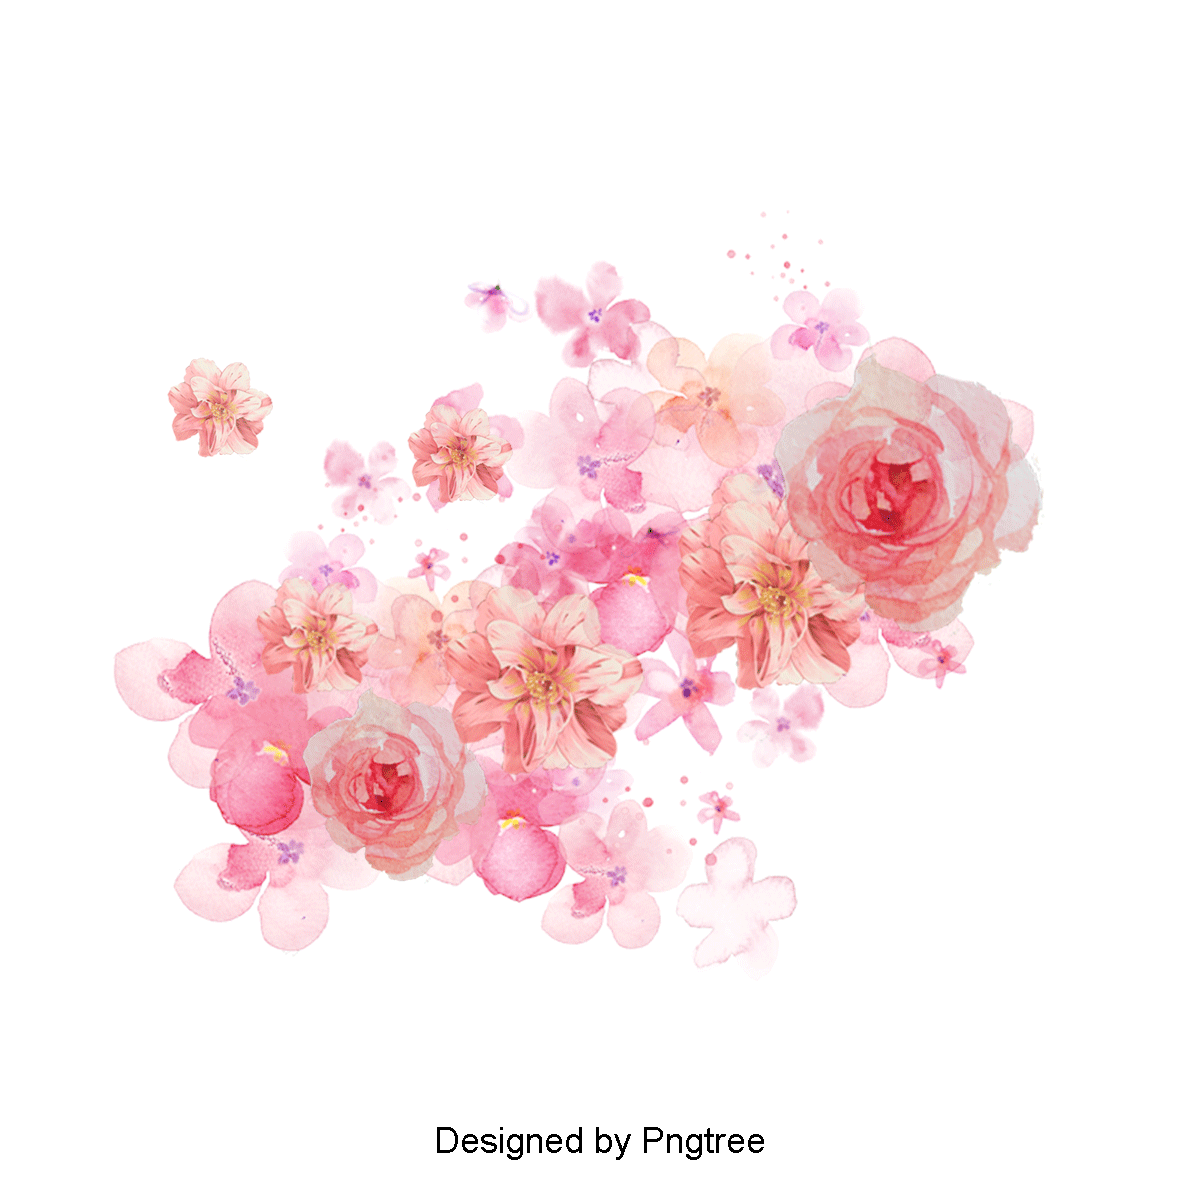

In [45]:
logo

In [44]:
logo.format_description

'Portable network graphics'

In [41]:
logo._getexif()

In [42]:
logo.getchannel

<bound method Image.getchannel of <PIL.PngImagePlugin.PngImageFile image mode=P size=1200x1200 at 0x16F5CA505F8>>

In [43]:
np.array(logo).shape  # 2차원...?

(1200, 1200)

In [46]:
logo.split()  # 하나만 나옴

(<PIL.Image.Image image mode=P size=1200x1200 at 0x16F5CA50048>,)

**mode의 의미**

https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes

- P : 8-bit pixels, mapped to any other mode using a color palette
- color space와 type을 구분하는 PIL의 방식이 나와있음.

</br>

### channel 의미

- 색상정보의 위치(last, first)

In [47]:
import tensorflow as tf

In [48]:
tf.keras.backend.image_data_format()   # 기본 옵션

'channels_last'

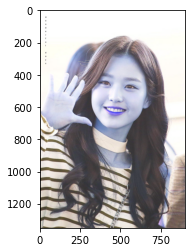

In [50]:
import cv2
jang_cv = cv2.imread('1.jpg')
plt.imshow(jang_cv) 
#numpy로 불러옴
# 색깔이...

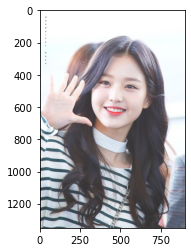

In [51]:
plt.imshow(jang_cv[...,::-1])   # BGR순서라 거꾸로

In [61]:
img = Image.open('2.jpg')

In [62]:
img.size

(4032, 3024)

In [63]:
img.format_description

'JPEG (ISO 10918)'

In [64]:
img.mode

'RGB'

In [68]:
img.info['dpi']  # DPI정보

(72, 72)

In [69]:
img.getexif()

### 이미지 간의 연산

- **channel operation 도구**

In [70]:
from PIL import ImageChops
dir(ImageChops)

['Image',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add',
 'add_modulo',
 'blend',
 'composite',
 'constant',
 'darker',
 'difference',
 'duplicate',
 'hard_light',
 'invert',
 'lighter',
 'logical_and',
 'logical_or',
 'logical_xor',
 'multiply',
 'offset',
 'overlay',
 'screen',
 'soft_light',
 'subtract',
 'subtract_modulo']

### numpy로 그림 그리기

#### 좌표축 그리기(mashgrid 이용)

In [78]:
a = np.array([1,2,3])
b = np.array([10,20,30])

In [75]:
np.meshgrid(a)

[array([1, 2, 3])]

In [76]:
np.meshgrid(a,b)

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])]

In [77]:
x,y = np.meshgrid(a,b)
x+y  # 좌표축을 만들때

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [81]:
a = np.array([0,1,2,3])
b = np.array([0,10,20,30])
x,y = np.meshgrid(a,b)
x+y 

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

In [82]:
x,y = np.ix_(b,a)
x+y

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

In [84]:
x,y = np.atleast_2d(a,b)
x+y.T

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

In [85]:
x,y = np.ogrid[0:100,0:100]
x+y

array([[  0,   1,   2, ...,  97,  98,  99],
       [  1,   2,   3, ...,  98,  99, 100],
       [  2,   3,   4, ...,  99, 100, 101],
       ...,
       [ 97,  98,  99, ..., 194, 195, 196],
       [ 98,  99, 100, ..., 195, 196, 197],
       [ 99, 100, 101, ..., 196, 197, 198]])

In [86]:
mask = 2*x - y == 0
# true false array 생성

In [87]:
mask

array([[ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [88]:
grid = np.ones_like((x+y))
grid[mask] = 255

In [89]:
grid

array([[255,   1,   1, ...,   1,   1,   1],
       [  1,   1, 255, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       ...,
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]])

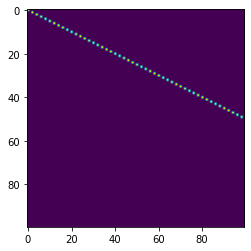

In [90]:
plt.imshow(grid)

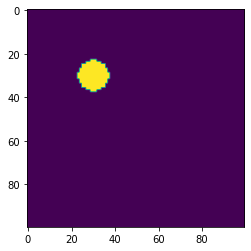

In [102]:
mask = (x-30)*(x-30) + (y-30)*(y-30) <= 50
grid = np.ones_like((x+y))
grid[mask] = 255
plt.imshow(grid)

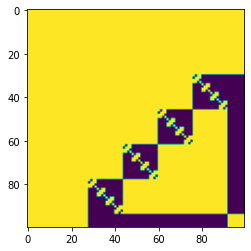

In [103]:
mask = (x-30)^2 + (y-30)^2 <= 50
grid = np.ones_like((x+y))
grid[mask] = 255
plt.imshow(grid)

위의 방법들은 ML/DL을 사용하지 않을 경우 사용될 예정!